## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_2407-0308-2023.csv', firstRow=708, lastRow=714)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_010823_S709-714.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)
#default t_baseline=25

## Analyse Water Addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=54s and ended at t=464s; mass=45.4178g
This equals a volume of 45.509m; expected was 45.72mL; error is 0.461%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.0019999999999999996 g/s and for 2nd derivative = 0.0004375 g/s^2


<IPython.core.display.Javascript object>


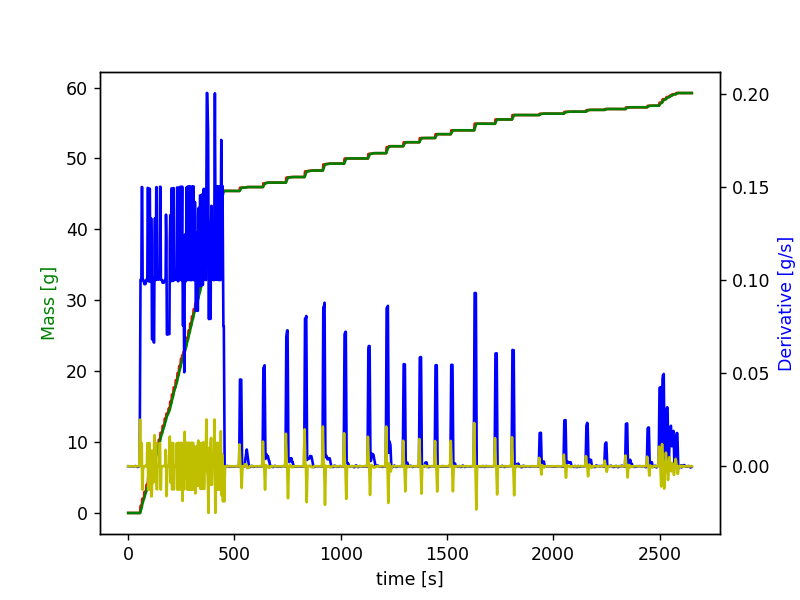

Addition of 0.556g Texapon SB 3 KC detected from 520s to 570s - expected volume = 0.927mL and actual volume = 0.503mL (resulting error is 45.732%)
Addition of 0.634g Plantapon LC 7 detected from 630s to 670s - expected volume = 0.831mL and actual volume = 0.592mL (resulting error is 28.718%)
Addition of 0.794g Plantacare 2000 detected from 738s to 780s - expected volume = 0.861mL and actual volume = 0.735mL (resulting error is 14.634%)
Addition of 0.92g Plantacare 2000 detected from 826s to 874s - expected volume = 0.789mL and actual volume = 0.847mL (resulting error is 7.316%)
Addition of 0.98g Plantacare 2000 detected from 912s to 958s - expected volume = 0.865mL and actual volume = 0.901mL (resulting error is 4.134%)
Addition of 0.732g Dehyton MC detected from 1012s to 1034s - expected volume = 0.745mL and actual volume = 0.677mL (resulting error is 9.13%)
Addition of 0.748g Dehyton ML detected from 1124s to 1166s - expected volume = 0.945mL and actual volume = 0.698mL (resulting er

In [3]:
# default: bl_mult=5, mergeSens=10
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

#t2 = massProfile.defineIngredientsManually(specType='surfactant',steps=steps,show=True,manualTimes=[560,600,700,800,900,1000,1100,1150,1250,1320,1400,1500,1580,1650,1730,1830,1920,2000,2080,2140])

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.0025 g/s and for 2nd derivative = 0.000546875 g/s^2


<IPython.core.display.Javascript object>


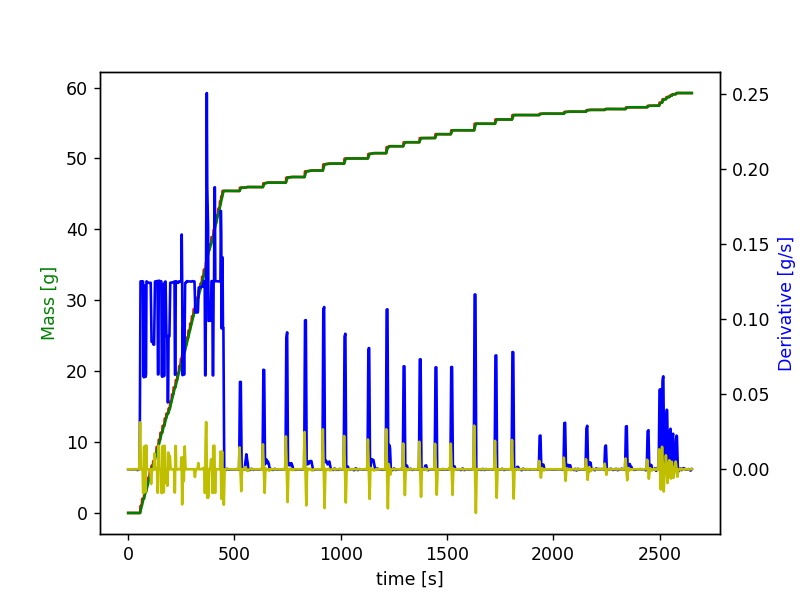

Addition of 0.203g Salcare Super 7 detected from 1930s to 1960s - expected volume = 0.257mL and actual volume = 0.183mL (resulting error is 28.772%)
Addition of 0.289g Salcare Super 7 detected from 2046s to 2086s - expected volume = 0.268mL and actual volume = 0.263mL (resulting error is 1.658%)
Addition of 0.255g Salcare Super 7 detected from 2150s to 2184s - expected volume = 0.206mL and actual volume = 0.231mL (resulting error is 12.5%)
Addition of 0.125g Salcare Super 7 detected from 2238s to 2256s - expected volume = 0.099mL and actual volume = 0.113mL (resulting error is 13.523%)
Addition of 0.253g Salcare Super 7 detected from 2336s to 2366s - expected volume = 0.221mL and actual volume = 0.229mL (resulting error is 3.74%)
Addition of 0.227g Salcare Super 7 detected from 2438s to 2468s - expected volume = 0.192mL and actual volume = 0.202mL (resulting error is 5.407%)


In [4]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=5, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

#t3 = massProfile.defineIngredientsManually(specType='polyelectrolyte',steps=steps,show=True,manualTimes=[2014,2112,2210,2314,2412,2494,2564])

## Analyse Thickeners

<IPython.core.display.Javascript object>


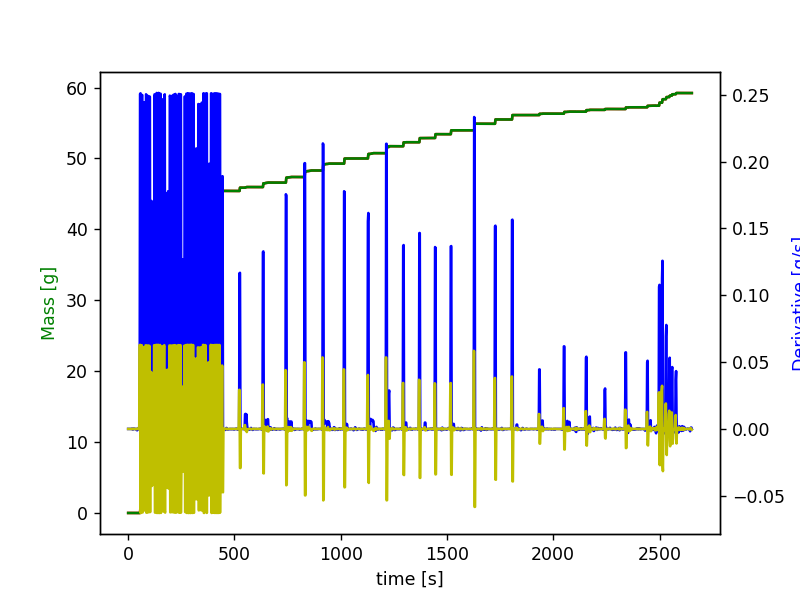

Addition of 0.419g Arlypon TT detected from 2490s to 2506s - expected volume = 0.491mL and actual volume = 0.437mL (resulting error is 11.04%)
Addition of 0.489g Arlypon TT detected from 2506s to 2522s - expected volume = 0.486mL and actual volume = 0.515mL (resulting error is 5.844%)
Addition of 0.304g Arlypon TT detected from 2522s to 2538s - expected volume = 0.266mL and actual volume = 0.318mL (resulting error is 19.685%)
Addition of 0.214g Arlypon TT detected from 2538s to 2554s - expected volume = 0.169mL and actual volume = 0.224mL (resulting error is 32.099%)
Addition of 0.183g Arlypon TT detected from 2554s to 2568s - expected volume = 0.161mL and actual volume = 0.191mL (resulting error is 18.831%)
Addition of 0.168g Arlypon TT detected from 2568s to 2588s - expected volume = 0.151mL and actual volume = 0.173mL (resulting error is 15.068%)


In [5]:
# default bl_mult = 1, default mergeSens = 1
#t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=1, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

t4 = massProfile.defineIngredientsManually(specType='thickener',steps=steps,show=True,manualTimes=[2490,2506,2522,2538,2554,2568,2588])

## Consolidate results and create output

In [6]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_010823_S709-S714.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_8204\1444229621.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
708,709.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,7.723542,0.0,0.000000,9.605394,0.00000,0.0,0.0,0.0,2.095535,0.0,4.325266
709,710.0,5.788042,0.0,0.00000,0.0,8.269078,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,3.011459,0.0,5.093310
710,711.0,0.000000,0.0,0.00000,0.0,8.998191,7.156874,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,2.498546,0.0,2.974285
711,712.0,0.000000,0.0,0.00000,0.0,9.560627,0.000000,0.0,0.000000,0.0,11.382210,0.000000,0.00000,0.0,0.0,0.0,1.218373,0.0,2.087942
712,713.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,9.657717,0.0,10.775253,0.000000,0.00000,0.0,0.0,0.0,2.494500,0.0,1.803431
713,714.0,0.000000,0.0,6.46779,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,12.55284,0.0,0.0,0.0,2.313023,0.0,1.714674
